In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# loading the files
df1=pd.read_csv('Application_data.csv')

In [3]:
# checking no. of rows and columns in dataset
df1.shape

(307511, 122)

In [4]:
# checking for null valus in dataset
100*df1.isna().mean().sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [5]:
# droping columns with more than 40% null values in dataset
df1=df1.drop([i for i in df1.columns if 100*df1[i].isna().mean()>40],axis=1)

In [6]:
# now checking no. of rows and columns in dataset
df1.shape

(307511, 73)

In [7]:
# again checking for null values in dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [8]:
# The column AMT_ANNUITY has null values filling it with median as it is a numerical column
df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].median(),inplace=True)  

In [9]:
# checking for null values in column AMT_ANNUITY
df1['AMT_ANNUITY'].isna().sum()

0

In [10]:
# doing same for column AMT_GOODS_PRICE
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].median(),inplace=True)  
df1['AMT_GOODS_PRICE'].isna().sum()

0

In [11]:
# the column NAME_TYPE_SUITE has object type data so filling null values with mode 
df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode()[0], inplace=True)
df1['NAME_TYPE_SUITE'].isna().sum()

0

In [12]:
df1['CNT_FAM_MEMBERS'].fillna(df1['CNT_FAM_MEMBERS'].median(),inplace=True)
df1['OCCUPATION_TYPE'].fillna(df1['OCCUPATION_TYPE'].mode()[0], inplace=True)
df1['EXT_SOURCE_2'].fillna(df1['EXT_SOURCE_2'].median(),inplace=True)             
df1['EXT_SOURCE_3'].fillna(df1['EXT_SOURCE_3'].median(),inplace=True)
df1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
df1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
df1['DAYS_LAST_PHONE_CHANGE'].fillna(df1['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df1['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df1['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df1['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)

In [13]:
# checking null values in dataset
df1.isna().sum().sum()

0

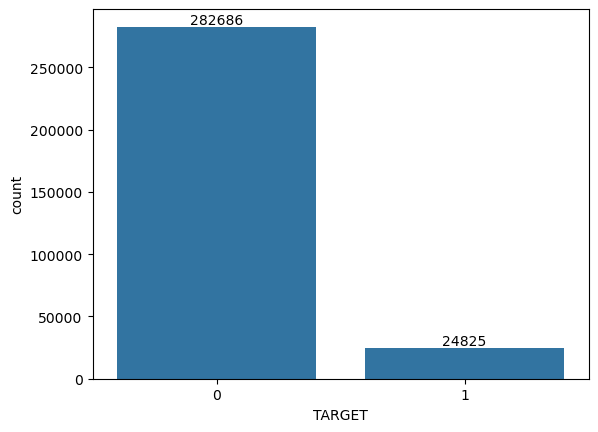

In [14]:
# plotting graph of target value
ax=sns.countplot(data=df1,x=df1['TARGET'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [15]:
# there are 92% value for 0 and 8% for 1 therefore there is a data imbalance in given dataset.

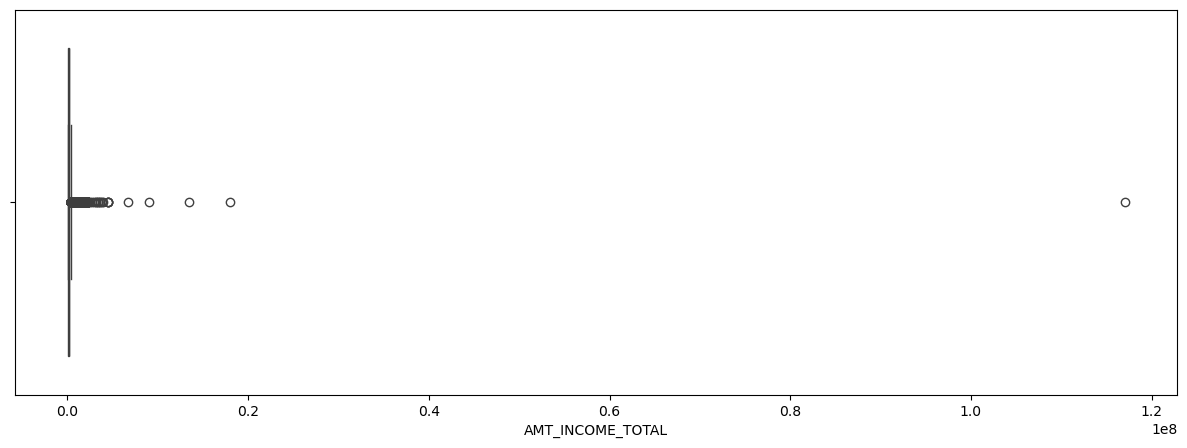

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df1['AMT_INCOME_TOTAL'])
plt.show()

In [17]:
# boxplot of AMT_INCOME_TOTAL shows that it has outliers

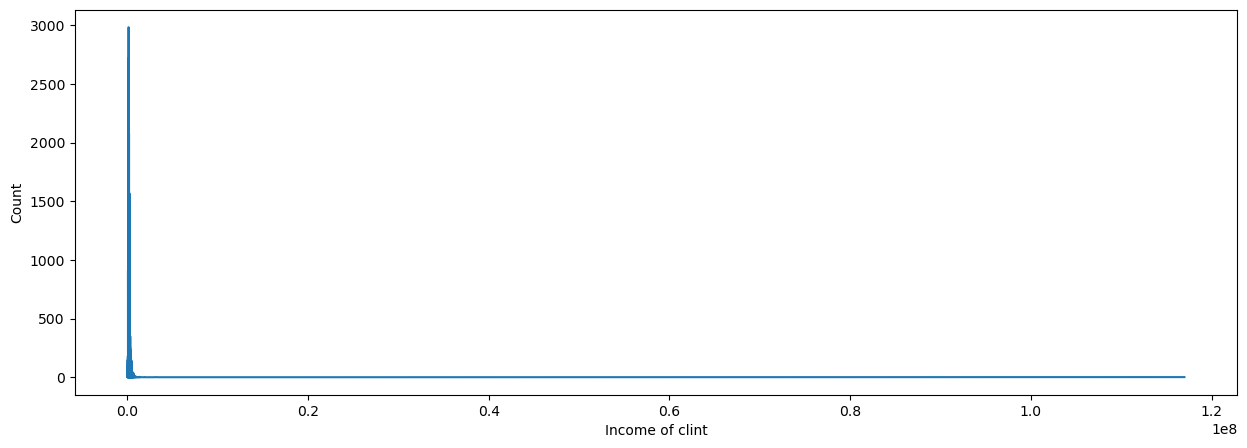

In [18]:
plt.figure(figsize=(15,5))
ax=sns.lineplot(x=df1['AMT_INCOME_TOTAL'],y=df1['TARGET'],estimator=np.sum,ci=None)
plt.xlabel('Income of clint')
plt.ylabel('Count')
plt.show()

In [19]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [20]:
# column SK_ID_CURR is of no use for us so dropping it
df1.drop('SK_ID_CURR',axis=1,inplace=True)

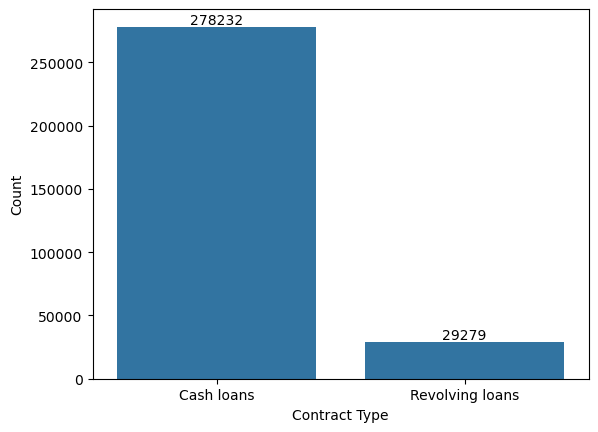

In [21]:
# univariate analysis for NAME_CONTRACT_TYPE column
ax=sns.countplot(data=df1,x=df1['NAME_CONTRACT_TYPE'])
plt.xlabel('Contract Type')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

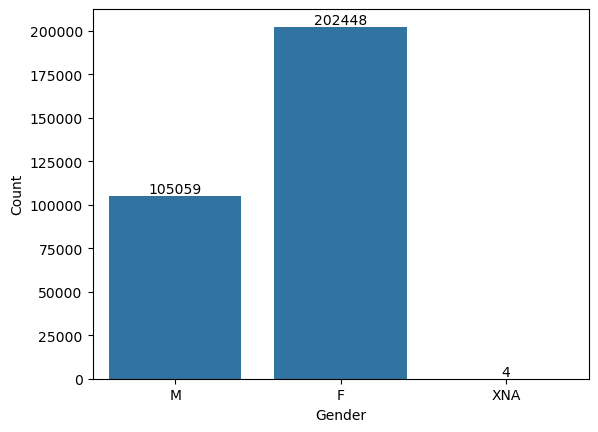

In [22]:
# univariate analysis for CODE_GENDER,
ax=sns.countplot(data=df1,x=df1['CODE_GENDER'])
plt.xlabel('Gender')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

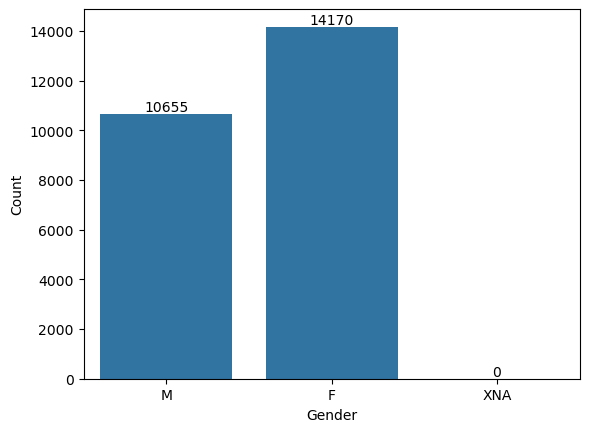

In [23]:
# bivariate analysis for CODE_GENDER and TARGET
ax=sns.barplot(x=df1['CODE_GENDER'],y=df1['TARGET'],estimator=np.sum,ci=None)
plt.xlabel('Gender')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [24]:
# from above it is clear that gender is not a good indicator for people to default

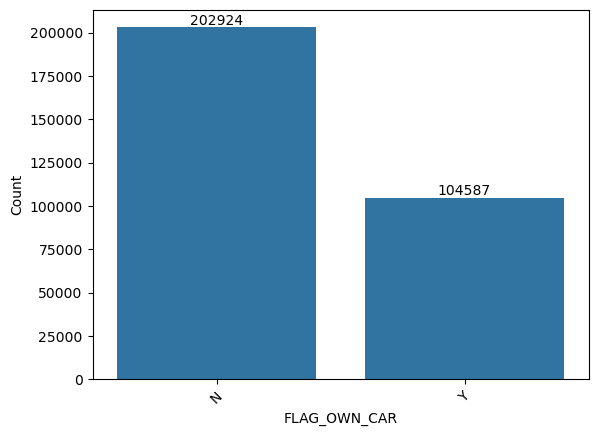

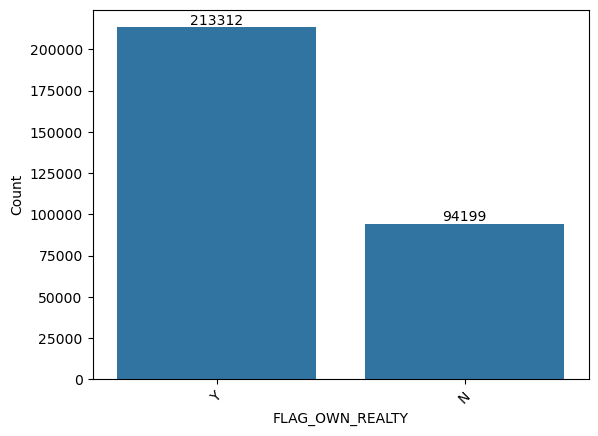

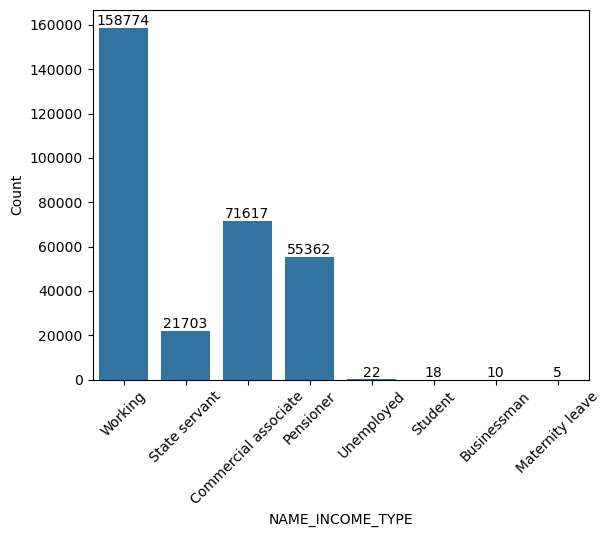

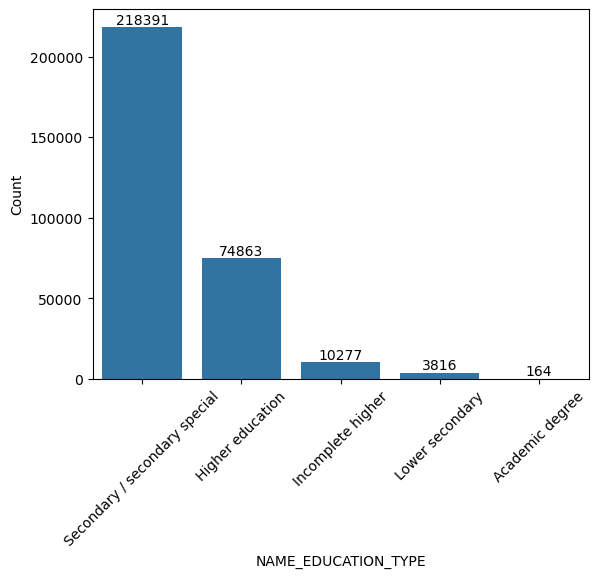

In [25]:
lst_obj=['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']
for i in lst_obj:
    ax=sns.countplot(data=df1,x=df1[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for bars in ax.containers:
        ax.bar_label(bars)
        plt.show()

In [26]:
# from above we can say most of the people who does not own a car or reality apply for loan.
# working people is catagory which appply for loan mostly.
# people with secondary/secondary special education are mostly applying for loan.

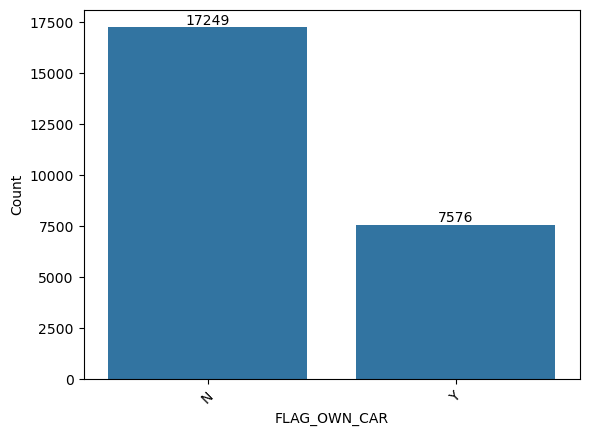

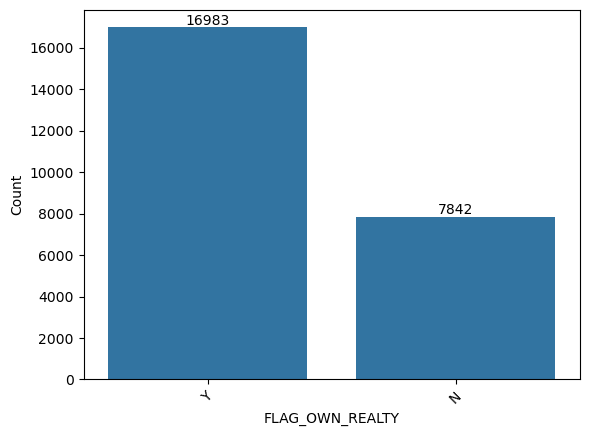

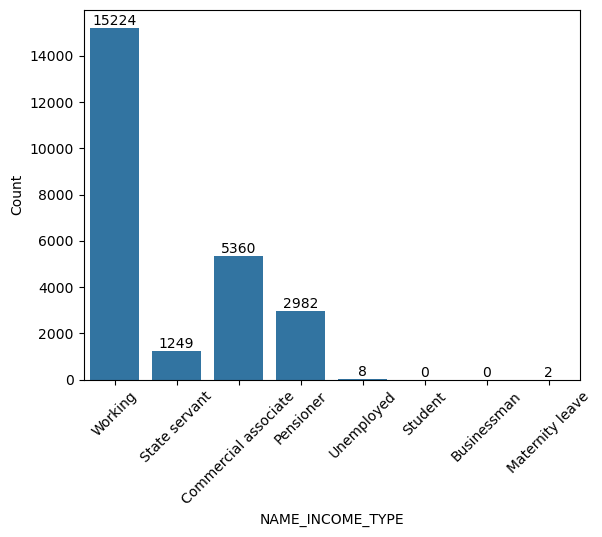

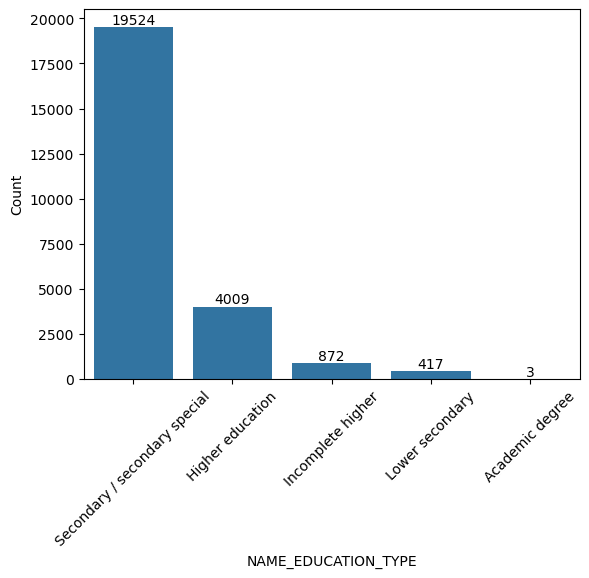

In [27]:
# now doing bivariate analysis
lst_obj=['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']
for i in lst_obj:
    ax=sns.barplot(x=df1[i],y=df1['TARGET'],estimator=np.sum,ci=None)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for bars in ax.containers:
        ax.bar_label(bars)
        plt.show()

In [28]:
# bivariate analysis shows no relation between lst_obj and people defaulting.

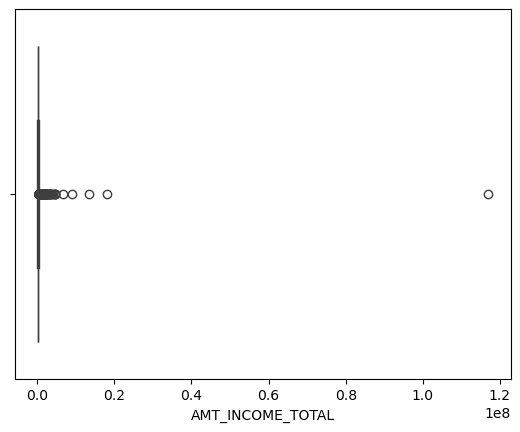

In [29]:
# checking for outliers in column 'AMT_INCOME_TOTAL'
sns.boxplot(x=df1['AMT_INCOME_TOTAL'])
plt.show()          

In [30]:
# there are outliers in column 'AMT_INCOME_TOTAL'
# people with lower income apply for loan most.

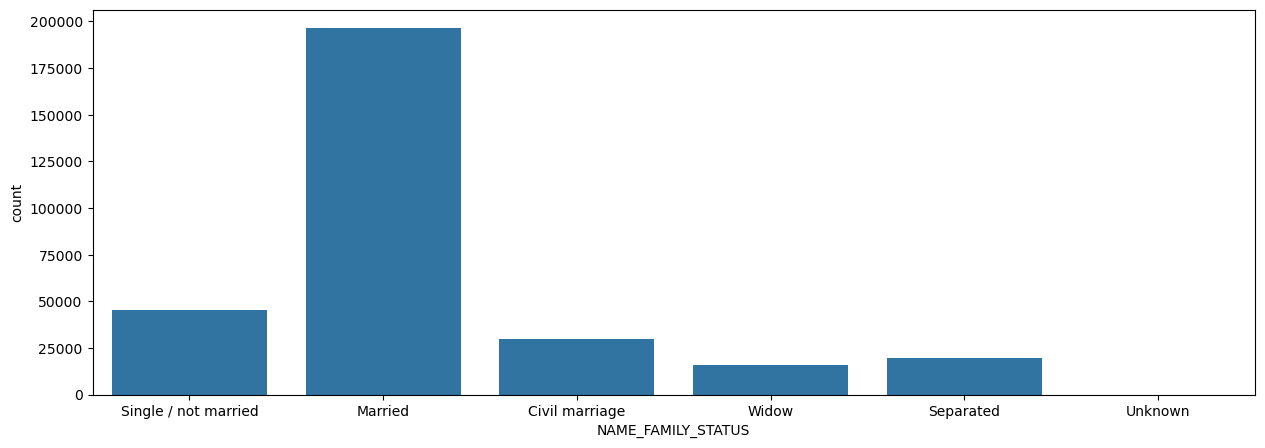

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(data=df1,x=df1['NAME_FAMILY_STATUS'])
plt.show()  

In [32]:
# married people are good to target as they apply most for loan.

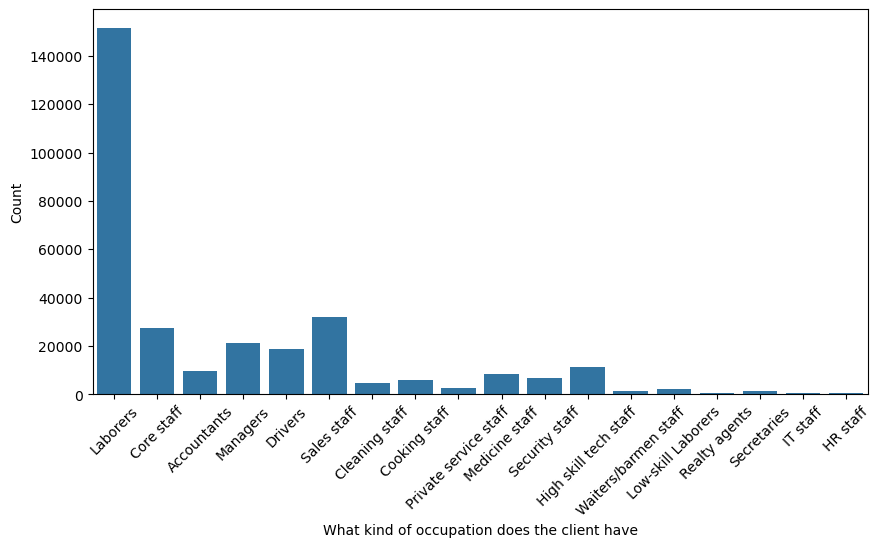

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x=df1['OCCUPATION_TYPE'])
plt.xlabel('What kind of occupation does the client have')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

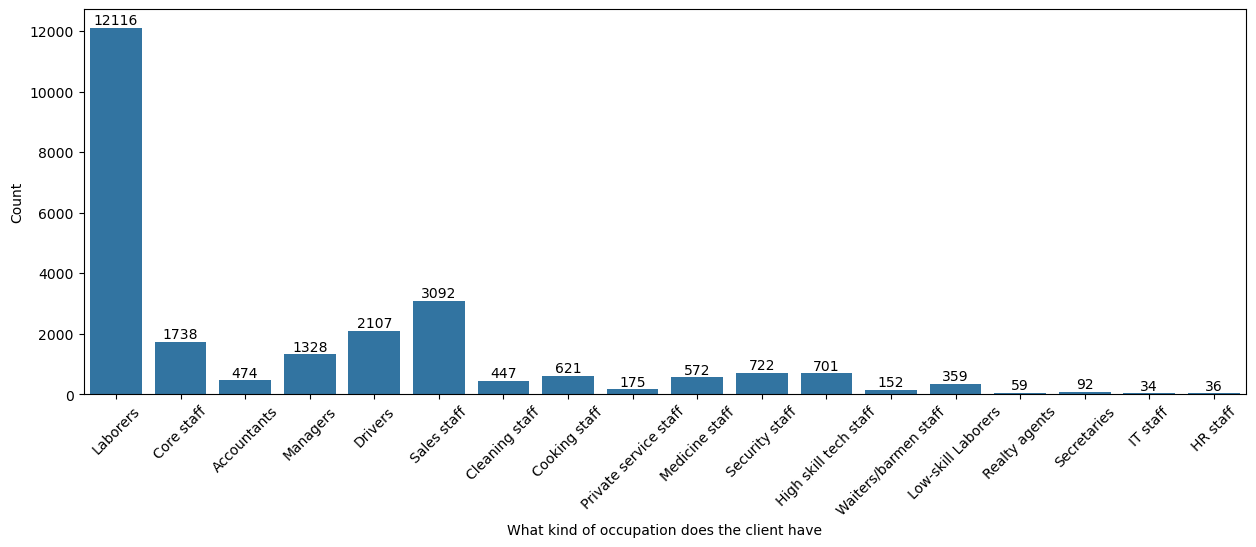

In [34]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x=df1['OCCUPATION_TYPE'],y=df1['TARGET'],estimator=np.sum,ci=None)
plt.xlabel('What kind of occupation does the client have')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [35]:
# Laborers are good target but they default also in same ratio. 

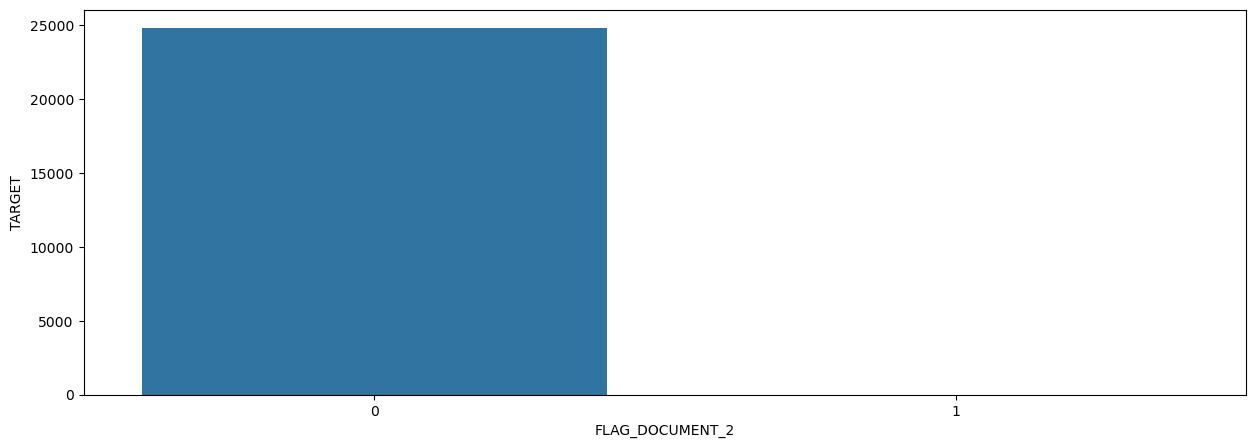

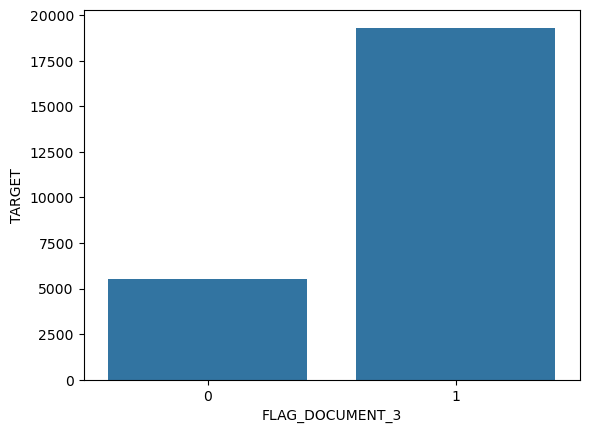

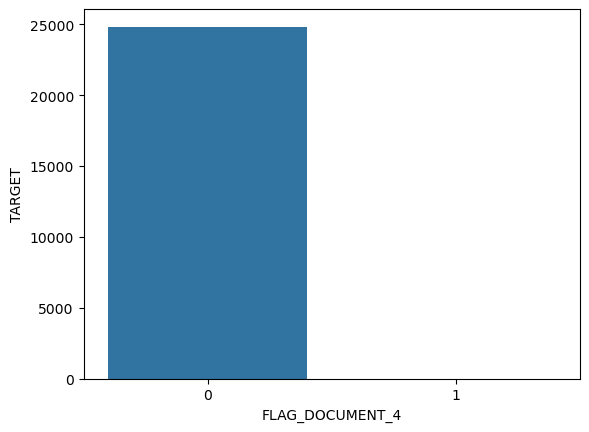

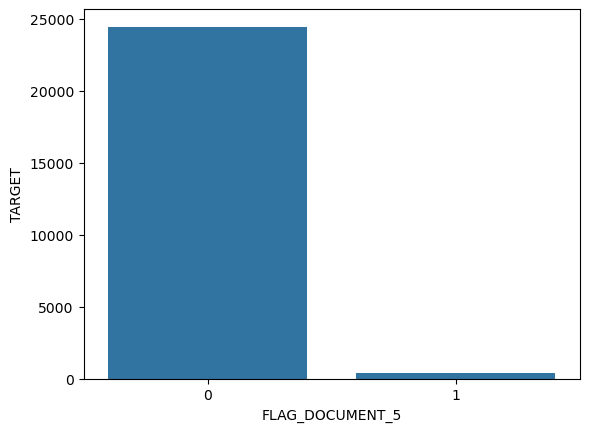

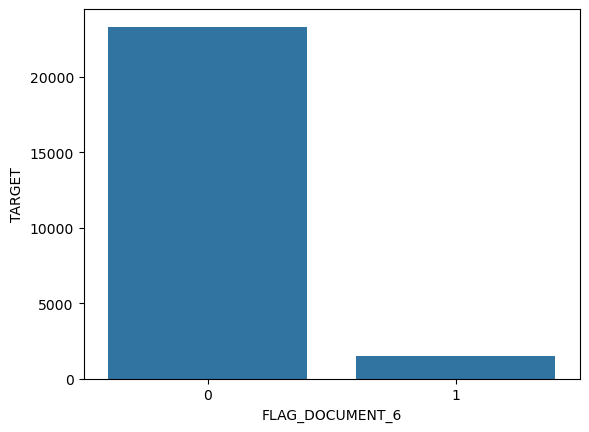

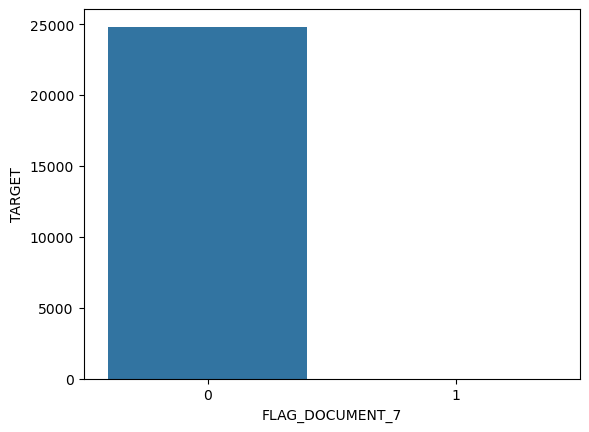

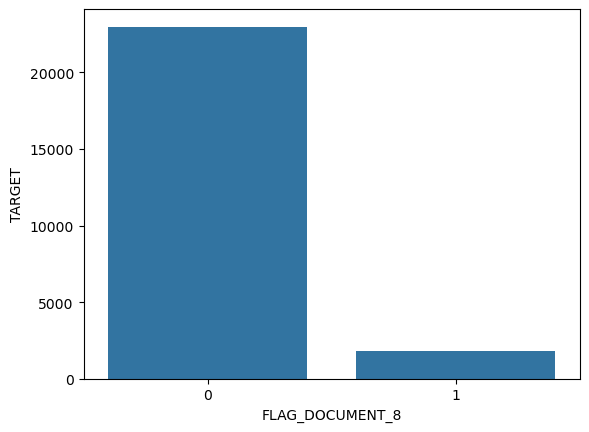

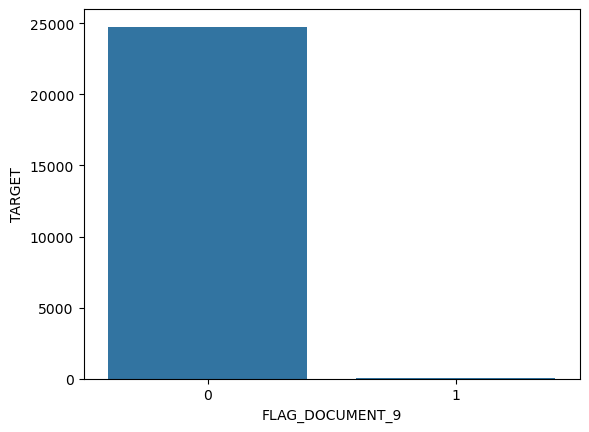

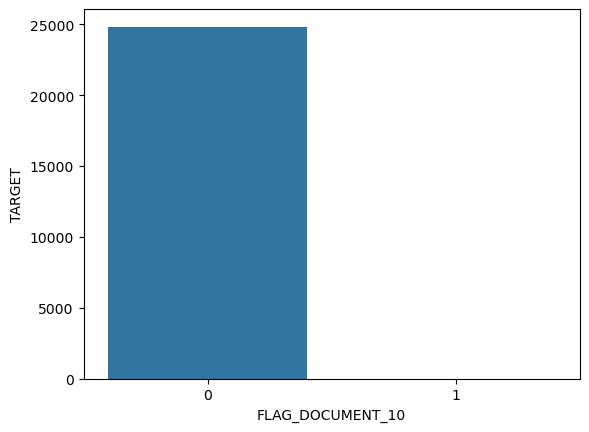

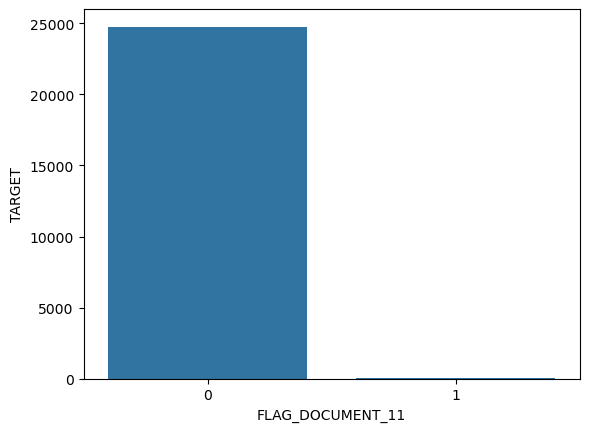

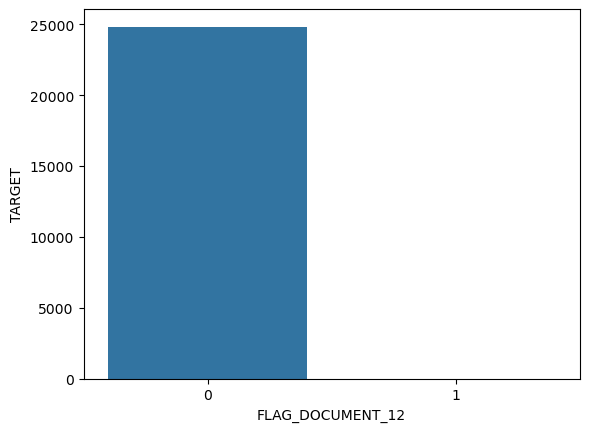

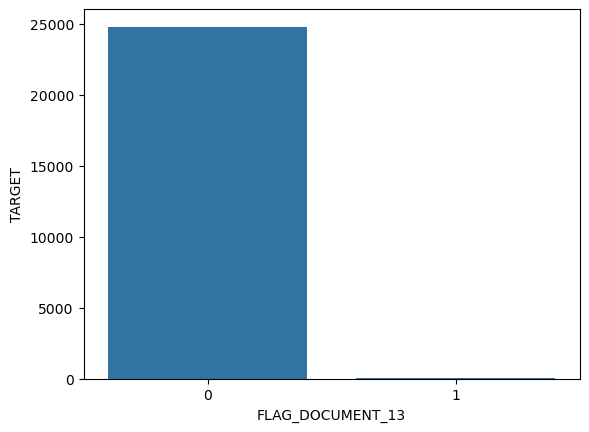

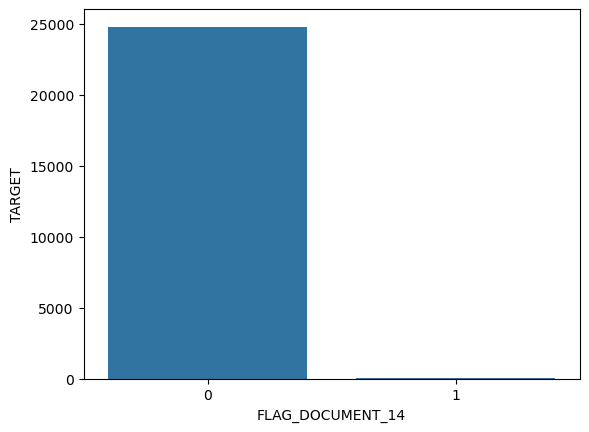

In [36]:
flag_doc=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
          'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14']
plt.figure(figsize=(15,5))
for i in flag_doc :
    sns.barplot(x=df1[i],y=df1['TARGET'],estimator=np.sum,ci=None)
    plt.show()

In [37]:
# there are many documents which are not provided by the people who default 

In [38]:
# Finding top 10 correlation for the Client with payment difficulties
df1=df1[df1['TARGET']==1]

In [39]:
num_cols=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']       

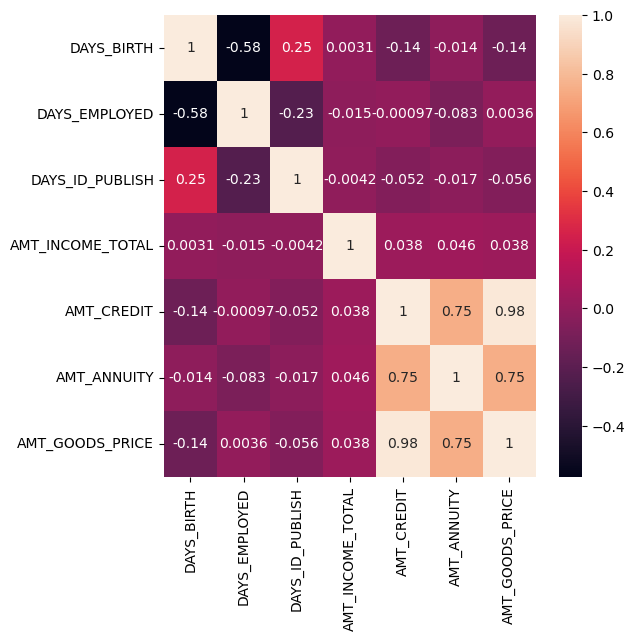

In [40]:
plt.figure(figsize=(6,6))
sns.heatmap(df1[num_cols].corr(),annot=True)
plt.show()

In [41]:
# the variables AMT_ANNUITY ,AMT_GOODS_PRICE,AMT_GOODS_PRICE and AMT_CREDIT are strongly correlated to each other.